# None-Linear Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
r = np.hstack([np.random.normal(.7, .2, 100), 
              np.random.normal(2, .3, 100)])
r.shape # vector data

(200,)

In [18]:
t = np.random.uniform(0, np.pi, 200)
X = np.array([r * np.cos(t), r * np.sin(t)]).T
X.shape, X.T.shape

((200, 2), (2, 200))

In [20]:
(r*np.cos(t)).shape

(200,)

In [15]:
z = np.array([0,1]).repeat(100)
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

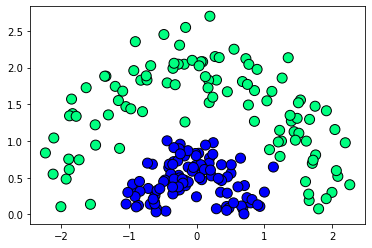

In [21]:
plt.scatter(X[:, 0], X[:, 1], 100, c=z, edgecolor='k', cmap='winter')
plt.show()

# XOR GATE CLASSIFICATION
#### XOR yields 1 if those 2 inputs are differs
| x0 | x1 | z |
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|


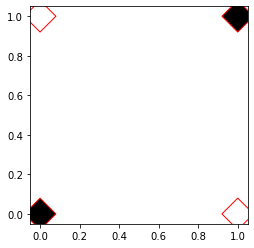

In [37]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
z = np.array([0,1,1,0])

plt.axes(aspect=1)
plt.scatter(X[:, 0], X[:, 1], 500,  c=z, marker='D', cmap='gray', 
            edgecolor='r', )
plt.show()

## The Point of this demonstration is :
# *We can't use straight line to classify these 2 groups*
### But we can use quadratic curve to classify
---

# 2 Layers Perceptrons
# - <b style='color:red'> 2 groups </b>
![2LP](https://phyblas.hinaboshi.com/rup/nayuki/umaki/g03.png)


### $a \: \rightarrow \: h \quad$ means linear computation $\rightarrow$ activation fucntion

## Computaion in each layers 
### $$
\begin{align}
\pmb{a}_1 &= \mathbf{x} \cdot \textbf{w}_1 + \vec{b}_1^T \\
\mathbf{h}_1 &= \phi(\pmb{a}_1) \\
\pmb{a}_2 &= \mathbf{h}_1 \cdot \textbf{w}_2 + \vec{b}_2^T \\
\mathbf{h}_2 &= \phi(\pmb{a}_2)
\end{align}
$$

#### $\phi$ = activation function

# - <b style='color:red'> 3 groups  </b>
![more than 2 LP](https://phyblas.hinaboshi.com/rup/nayuki/umaki/g05.png)
### $$
\begin{align}
\pmb{a}_3 &= \mathbf{h}_2 \cdot \textbf{w}_3 + \vec{b}_3^T \\
\mathbf{h}_3 &= \phi(\pmb{a}_3)
\end{align}
$$

# - <b style='color:red'> groups > 2 </b>
![more than 2 LP](https://phyblas.hinaboshi.com/rup/nayuki/umaki/g04.png)

# Activation Function between each layers


<h3>
    <ol>
        <li>
            AF between hidden layer
            <ul>
                <li>
                    <b style='color:red'>Use non-linear function as AF </b>
                    <ol>
                        <li>Sigmoid - old fashion</li>
                        <li style='color:orange'>ReLu</li>
                    </ol>
                </li>
            </ul>
        </li>
        <li>
            AF at last layer
            <ul>
                <li>Sigmoid if n_groups = 2</li>
                <li>Softmax if n_groups > 2</li>
            </ul>
        </li>
    </ol>
</h3>

<b style='color:orange'>
    <h1>
        ReLu
    </h1>
</b>
<h4>
    Rectified Linear Unit
</h4>
<p>Usually use insteads of sigmoid</p>


### $$
\begin{align}
\mathbf{ReLU}(a) = \left\{ \begin{array}{ll}
a \;\; ถ้า \;\; a &\ge 0 \\
0 \;\; ถ้า \;\; a &\le 0 \\
\end{array}
\right.
\end{align}
$$

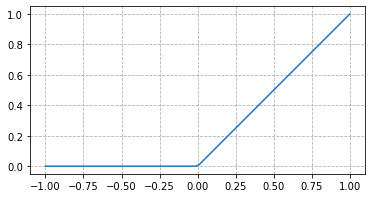

In [50]:
def ReLu(X):
    return np.maximum(0, X)
x = np.linspace(-1, 1, 100)
plt.axes(aspect=1)
plt.plot(x, ReLu(x) )
plt.grid(ls='--')
plt.show()

# XOR GATE feats ReLu

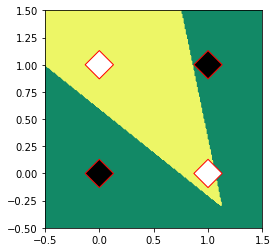

In [127]:
w1 = np.array([
    [1.5, .5],
    [1.2, 1.2]
])
b1 = np.array([-.8, -1.2])

w2 = np.array([1, -5 ])
b2 = -0.1

def p(X):
    a1 = np.dot(X, w1) + b1
    h1 = ReLu(a1)
    # h1 = a1 # TRY CANCEL THIS LINE
    
    a2 = np.dot(h1, w2) + b2
    return (a2 >= 0).astype(int)

plt.figure(figsize=(4,4))
mx, my = np.meshgrid(
    np.linspace(-.5, 1.5, 200),
    np.linspace(-.5, 1.5, 200)
)
mX = np.array([mx, my]).T
mz = p(mX)

plt.axes(aspect=1)
plt.contourf(mx, my, mz, cmap='summer')

a = plt.scatter(X[:, 0], X[:, 1], 400, cmap='gray', marker='D', edgecolor='r', 
           c=z)

plt.show()

In [70]:
mX.shape, mX.T.shape, 

((200, 200, 2), (2, 200, 200))

### See $a_1$ & $h_1$

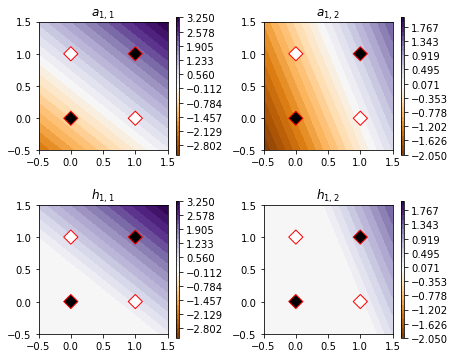

In [76]:
ma1 = np.dot(mX,w1) + b1
ma1 = ma1
mh1 = ReLu(ma1)
plt.figure(figsize=[6.4,5.2])
for i in [0,1]:
    mam = np.abs(ma1[:,:,i]).max()
    v = np.linspace(-mam,mam,30)
    for j in [0,1]:
        plt.subplot(221+i+2*j,aspect=1)
        if(j):
            plt.title('$h_{1,%d}$'%(i+1))
            plt.contourf(mx,my,mh1[:,:,i],v,cmap='PuOr')
        else:
            plt.title('$a_{1,%d}$'%(i+1))
            plt.contourf(mx,my,ma1[:,:,i],v,cmap='PuOr')
        plt.colorbar(pad=0.05,aspect=40)
        plt.scatter(X[:,0],X[:,1],100,c=z,edgecolor='r',marker='D',cmap='gray')
plt.tight_layout()
plt.show()

# Animate $h_1$ & $a_1$

In [77]:
from IPython.display import HTML
from matplotlib import animation
%matplotlib inline

In [138]:
mz.shape 

(200, 200)

In [149]:
k = np.random.randint(0, 5, size=[200,200])
# np.dot(mz*)
k.shape

(200, 200)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7fbb4411ea90>)

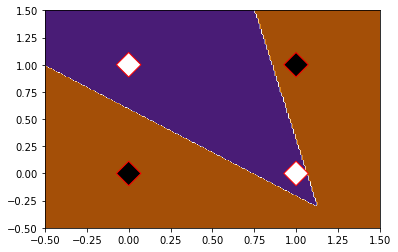

In [267]:
def init_fig():
    fig, ax = plt.subplots(1,1, )
    sct = ax.scatter(X[:, 0], X[:, 1], 300, zorder=99, cmap='gray', marker='D', c=z, 
              edgecolor='r')
    k = np.random.normal(size=[200,200])  
    # k = np.sin(k)  *  np.cos(k)
    # ctf = ax.contourf(mx,my,np.dot(mz, k),cmap='PuOr')
    # ctf = ax.contourf(mx,my,mz*k,cmap='PuOr')
    ctf = ax.contourf(mx,my,mz,cmap='PuOr')
    # ctf, _ = ax.contourf([], [], [])
    # ctf.set_data(mx,mx,mz)
    return fig, ax, sct, ctf
init_fig()

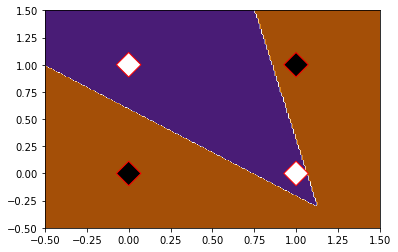

In [272]:
def get_anim(fig, ax, sct, ctf):
    
    def anim(frame):
        print('frame : ' , frame, end='\t')
        
        # SCATTER ANIMATION
        rand= np.random.random(size=[4,2])
        # sct.set_data(rand[:, 0], rand[:, 1])
        sct.set_offsets(rand)
        
        # CONTOURF ANIMAITON
        # for c in ctf.collections:
        #     c.remove()
        ctf.collections = []
        k = np.random.normal(size=[200,200])
        ctf_ = ax.contourf(mx,my,np.dot(mx,k), cmap='PuOr')
        # ctf_ = ax.contourf(mx,my,k * mx, cmap='PuOr')
    
        return sct, ctf_
    return anim
        
fig, ax, sct, ctf = init_fig()
anim__ = get_anim(fig, ax, sct, ctf)

In [134]:
np.random.random(size=[2,2])

array([[0.74617426, 0.62098105],
       [0.10490574, 0.8181586 ]])

frame :  0	frame :  0	frame :  1	frame :  2	frame :  3	frame :  4	frame :  5	frame :  6	frame :  7	frame :  8	frame :  9	frame :  10	frame :  11	frame :  12	frame :  13	frame :  14	frame :  15	frame :  16	frame :  17	frame :  18	frame :  19	

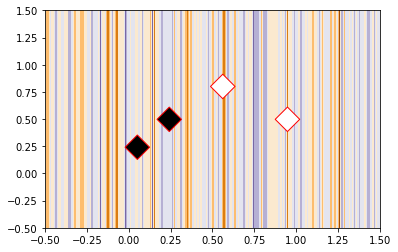

In [273]:
fig, ax, sct, ctf = init_fig()
animate = get_anim(fig, ax, sct, ctf)
anim = animation.FuncAnimation(fig, animate, frames=20)
HTML(anim.to_jshtml())

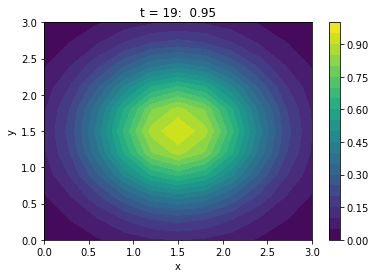

In [243]:
import pylab as plt
import numpy
import matplotlib.animation as animation
#plt.rcParams['animation.ffmpeg_path'] = r"C:\some_path\ffmpeg.exe"   # if necessary

# Generate data for plotting
Lx = Ly = 3
Nx = Ny = 11
Nt = 20
x = numpy.linspace(0, Lx, Nx)
y = numpy.linspace(0, Ly, Ny)
x,y = numpy.meshgrid(x,y)
z0 = numpy.exp(-(x-Lx/2)**2-(y-Ly/2)**2)   # 2 dimensional Gaussian

def some_data(i):   # function returns a 2D data array
    return z0 * (i/Nt)

fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(0, Ly), xlabel='x', ylabel='y')

cvals = numpy.linspace(0,1,Nt+1)      # set contour values 
cont = plt.contourf(x, y, some_data(0), cvals)    # first image on screen
plt.colorbar()


# animation function
def animate(i):
    global cont
    z = some_data(i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x, y, z, cvals)
    plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
# anim.save('animation.mp4', writer=animation.FFMpegWriter())
HTML(anim.to_jshtml())

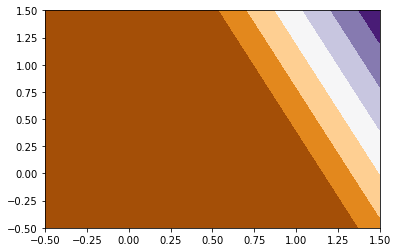

In [318]:
ma1 = np.dot(mX,w1) + b1
ma1 = ma1
mh1 = ReLu(ma1)

fig, ax = plt.subplots(1,1,)
# init function
def init():
    ctf = ax.contourf(mx,my,mh1[:,:,0], cmap='PuOr')

def animate(frame):
    i = frame
    
    global ctf
    # plt.
    ctf.collections = []
    ctf = ax.contourf(mx,my,mh1[:,:,i], cmap='PuOr')
    
    return ctf
    

anim = animation.FuncAnimation(fig, animate, frames=mh1.shape[2], init_func=init)
HTML(anim.to_jshtml())

In [275]:
mh1.shape

(200, 200, 2)